# Convergence Parameter Check (Value Experiment)
## eLife checks
## Individual fit

In [2]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# rhat
rhat_D_Inv_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_rhatsParams_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31_eLife.csv')
rhat_D_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_rhatsParams_individual_Dislike_NoBin_Gamma-11_NUTS_31_eLife.csv')
rhat_L_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_rhatsParams_individual_Like_NoBin_Gamma-11_NUTS_31_eLife.csv')

# ess: effective sample size
ess_D_Inv_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_essParams_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31_eLife.csv')
ess_D_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_essParams_individual_Dislike_NoBin_Gamma-11_NUTS_31_eLife.csv')
ess_L_Full1 = pd.read_csv('results/convergence/GlamDataFF2018_ind_essParams_individual_Like_NoBin_Gamma-11_NUTS_31_eLife.csv')

 # rhat parameters

 % participants with off parameters (|1 - $\^R$| < 0.05)
$\gamma$
Like:0.0
Dislike Inv:0.0
Dislike :0.0
 % participants with off parameters (|1 - $\^R$| < 0.05)
$\nu$
Like:0.03225806451612903
Dislike Inv:0.0
Dislike :0.03225806451612903
 % participants with off parameters (|1 - $\^R$| < 0.05)
$\tau$
Like:0.0
Dislike Inv:0.0
Dislike :0.03225806451612903
 % participants with off parameters (|1 - $\^R$| < 0.05)
$\sigma$
Like:0.03225806451612903
Dislike Inv:0.0
Dislike :0.03225806451612903


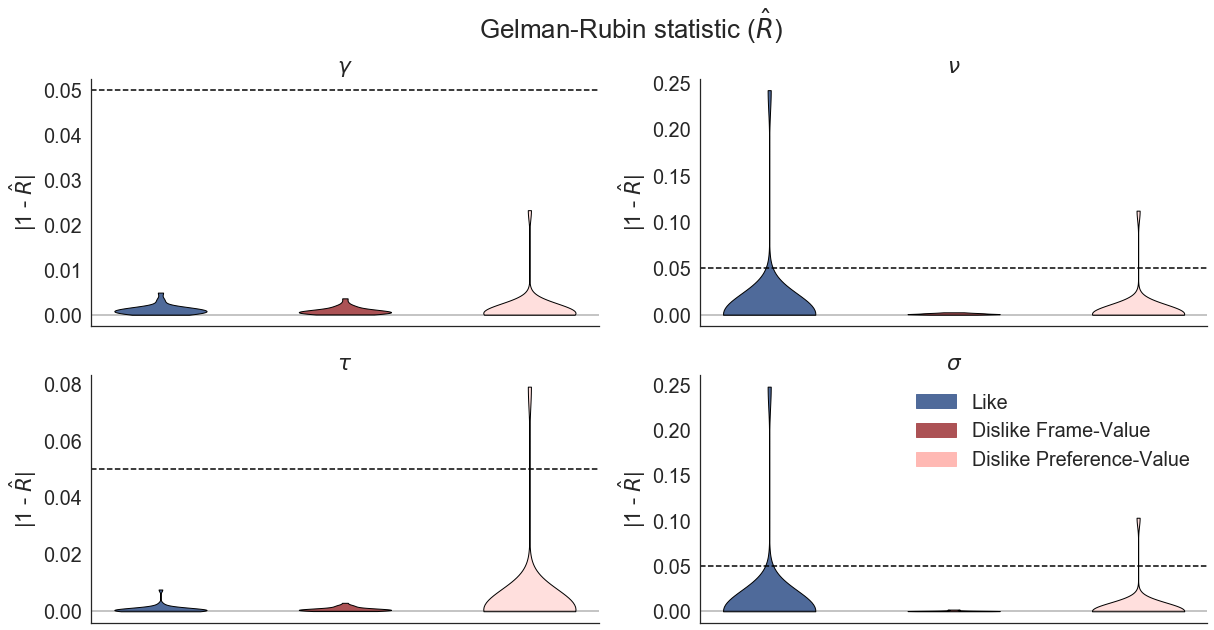

In [93]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
#plt.suptitle('Like and dislike conditions')

my_pal = ['#4F6A9A',  '#AC5255', '#FFDFDD']

params_to_read = rhat_D_Inv_Full1.columns[1:-1]
titles_to_read = ['$\gamma$','$\\nu$','$\\tau$','$\sigma$']
for i in range(len(params_to_read)):
    plt.subplot(221 + i)
    all_arr = [np.abs(1- rhat_L_Full1[params_to_read[i]]),
              np.abs(1- rhat_D_Inv_Full1[params_to_read[i]]),
              np.abs(1- rhat_D_Full1[params_to_read[i]])]
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for ii, face in enumerate(parts['bodies']):
       # face.set_hatch('//')
        face.set_facecolor(my_pal[ii])
        face.set_edgecolor('black')
        face.set_alpha(1)
    #plt.xticks([0, 1, 2], ['Like', 'Dislike \n Frame', 'Dislike \n Pref'])
    #plt.yticks([0.5, 1,], [50, 100])
    plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
    plt.axhline(0, ls='-', color='black',alpha = 0.3)
    plt.axhline(0.05, ls='--', color='black')
    plt.title(titles_to_read[i])
    # Turn off tick labels
    plt.ylabel('|1 - $\^R$|')
   
    sns.despine()
    
    
    print (' % participants with off parameters (|1 - $\^R$| < 0.05)')
    print (titles_to_read[i])
    print ('Like:' + str(np.sum(all_arr[0] >0.05)/len(all_arr[0])))
    print ('Dislike Inv:' + str(np.sum(all_arr[1] >0.05)/len(all_arr[1])))
    print ('Dislike :' + str(np.sum(all_arr[2] >0.05)/len(all_arr[2])))
    
like_patch = mpatches.Patch(color='#4F6A9A',hatch='', label='Like')
dislike1_patch = mpatches.Patch(color='#AC5255',hatch='', label='Dislike Frame-Value')
dislike2_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Dislike Preference-Value')

leg = plt.legend(handles=[like_patch,dislike1_patch,dislike2_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
plt.suptitle('Gelman-Rubin statistic ($\^R$) ')
plt.show()

In [95]:
totElems = (len(rhat_D_Inv_Full1))*4
D_INV_rhat_percentDiv = ((np.abs(1 - rhat_D_Inv_Full1[['gamma','v','tau','s']])) > 0.05).to_numpy().sum()/totElems
L_rhat_percentDiv = ((np.abs(1 - rhat_L_Full1[['gamma','v','tau','s']])) > 0.05).to_numpy().sum()/totElems
D_rhat_percentDiv = ((np.abs(1 - rhat_D_Full1[['gamma','v','tau','s']])) > 0.05).to_numpy().sum()/totElems

print(L_rhat_percentDiv,D_INV_rhat_percentDiv,D_rhat_percentDiv)

0.016129032258064516 0.0 0.024193548387096774


# Effective samples size

 % participants with off parameters (ESS < 100)
$\gamma$
Like:0.03225806451612903
Dislike Inv:0.0
Dislike :0.0
 % participants with off parameters (ESS < 100)
$\nu$
Like:0.06451612903225806
Dislike Inv:0.0
Dislike :0.03225806451612903
 % participants with off parameters (ESS < 100)
$\tau$
Like:0.03225806451612903
Dislike Inv:0.0
Dislike :0.03225806451612903
 % participants with off parameters (ESS < 100)
$\sigma$
Like:0.06451612903225806
Dislike Inv:0.0
Dislike :0.03225806451612903


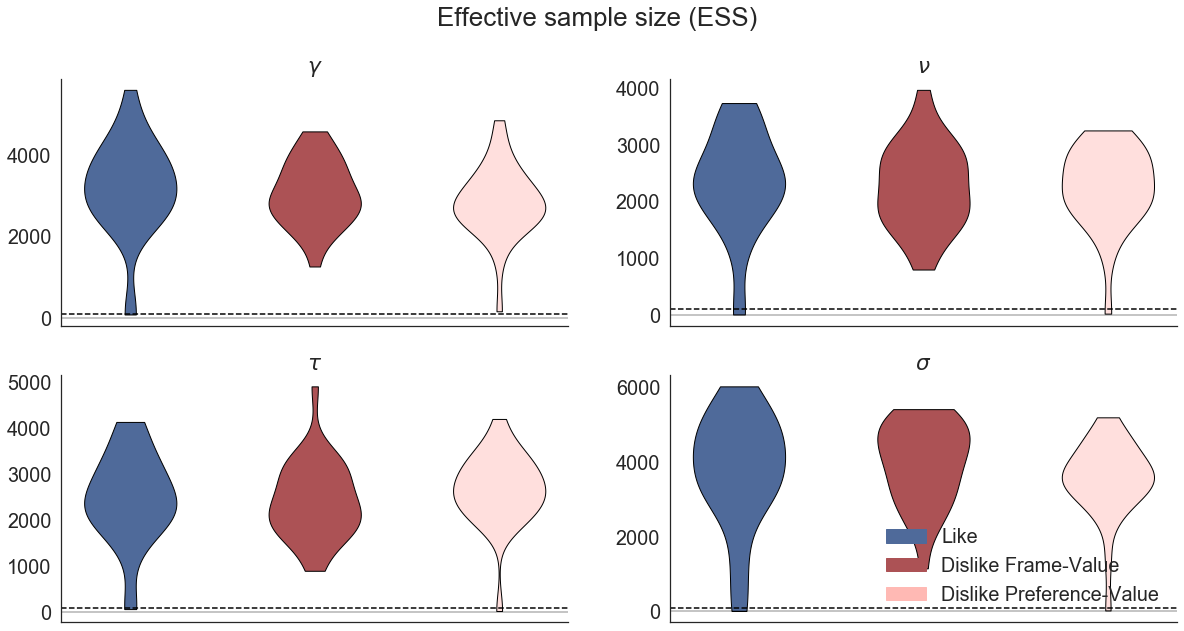

In [94]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
#plt.suptitle('Like and dislike conditions')

my_pal = ['#4F6A9A',  '#AC5255', '#FFDFDD']

params_to_read = ess_D_Inv_Full1.columns[1:]
titles_to_read = ['$\gamma$','$\\nu$','$\\tau$','$\sigma$']
for i in range(len(params_to_read)):
    plt.subplot(221 + i)
    
    all_arr = [np.abs(1- ess_L_Full1[params_to_read[i]]),
              np.abs(1- ess_D_Inv_Full1[params_to_read[i]]),
              np.abs(1- ess_D_Full1[params_to_read[i]])]
    #bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='ESS')
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for ii, face in enumerate(parts['bodies']):
       # face.set_hatch('//')
        face.set_facecolor(my_pal[ii])
        face.set_edgecolor('black')
        face.set_alpha(1)
    #plt.xticks([0, 1, 2], ['Like', 'Dislike \n Frame', 'Dislike \n Pref'])
    #plt.yticks([0.5, 1,], [50, 100])
    plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
    plt.axhline(0, ls='-', color='black',alpha = 0.3)
    plt.axhline(100, ls='--', color='black')
    plt.title(titles_to_read[i])
    # Turn off tick labels
    sns.despine()
    
    print (' % participants with off parameters (ESS < 100)')
    print (titles_to_read[i])
    print ('Like:' + str(np.sum(all_arr[0] < 100)/len(all_arr[0])))
    print ('Dislike Inv:' + str(np.sum(all_arr[1] <100)/len(all_arr[1])))
    print ('Dislike :' + str(np.sum(all_arr[2] <100)/len(all_arr[2])))
    
like_patch = mpatches.Patch(color='#4F6A9A',hatch='', label='Like')
dislike1_patch = mpatches.Patch(color='#AC5255',hatch='', label='Dislike Frame-Value')
dislike2_patch = mpatches.Patch(color='#FFB9B4',hatch='', label='Dislike Preference-Value')

leg = plt.legend(handles=[like_patch,dislike1_patch,dislike2_patch],loc = 4)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
    
    
plt.suptitle('Effective sample size (ESS) ')
    
plt.show()

In [96]:
D_INV_ess_percentDiv = ((np.abs(1 - ess_D_Inv_Full1[['gamma','v','tau','s']])) < 100).to_numpy().sum()/totElems
L_ess_percentDiv = ((np.abs(1 - ess_L_Full1[['gamma','v','tau','s']])) < 100).to_numpy().sum()/totElems
D_ess_percentDiv = ((np.abs(1 - ess_D_Full1[['gamma','v','tau','s']])) < 100).to_numpy().sum()/totElems

print(L_ess_percentDiv,D_INV_ess_percentDiv,D_ess_percentDiv)

0.04838709677419355 0.0 0.024193548387096774
